In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [309]:
df_births = pd.read_csv('births.csv')

In [310]:
df_births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [311]:
df_births.columns

Index(['year', 'month', 'day', 'gender', 'births'], dtype='object')

In [312]:
df_births.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [313]:
df_births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [314]:
df_births.shape

(15547, 5)

In [315]:
df_births.isnull().values.any()

True

In [316]:
df_births.isnull().sum().sum()

480

In [317]:
df_births.isnull()

,year,month,day,gender,births
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
15542,False,False,True,False,False
15543,False,False,True,False,False
15544,False,False,True,False,False
15545,False,False,True,False,False


In [318]:
pd.isnull(df_births)

,year,month,day,gender,births
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
15542,False,False,True,False,False
15543,False,False,True,False,False
15544,False,False,True,False,False
15545,False,False,True,False,False


In [319]:
nan_rows_year = df_births[df_births['year'].isnull()]
nan_rows_month = df_births[df_births['month'].isnull()]
nan_rows_day = df_births[df_births['day'].isnull()]
nan_rows_gender = df_births[df_births['gender'].isnull()]
nan_rows_births = df_births[df_births['births'].isnull()]

In [320]:
nan_rows_year

,year,month,day,gender,births


In [321]:
df_births['year'].isnull().sum()

0

In [322]:
nan_rows_month

,year,month,day,gender,births


In [323]:
df_births['month'].isnull().sum()

0

In [324]:
nan_rows_day

,year,month,day,gender,births
15067,1989,1,NaN,F,156749
15068,1989,1,NaN,M,164052
15069,1989,2,NaN,F,146710
15070,1989,2,NaN,M,154047
15071,1989,3,NaN,F,165889
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [325]:
df_births['day'].isnull().sum()

480

In [326]:
nan_rows_gender

,year,month,day,gender,births


In [327]:
df_births['gender'].isnull().sum()

0

In [328]:
nan_rows_births

,year,month,day,gender,births


In [329]:
df_births['births'].isnull().sum()

0

In [330]:
df_nan_check = [df_births['year'].isnull().sum(), 
                df_births['month'].isnull().sum(), 
                df_births['day'].isnull().sum(), 
                df_births['gender'].isnull().sum(), 
                df_births['year'].isnull().sum()]

In [331]:
df_nan_check

[0, 0, 480, 0, 0]

In [332]:
df_nan_check_2 = pd.DataFrame(index=df_births.columns, columns=['NaN Count'])

for column in df_births.columns:
    df_nan_check_2.loc[column, 'NaN Count'] = df_births[column].isnull().sum()

In [333]:
df_nan_check_2

,NaN Count
year,0
month,0
day,480
gender,0
births,0


In [334]:
# There are 480 mising values in column 'day'
# No mising values in any other column

In [335]:
# Add a new column: decade
# 1960 : 1960 - 1969
# 1970 : 1970 - 1979
# 1980 : 1980 - 1989
# 1990 : 1990 - 1999
# 2000 : 2000 - 2010

In [336]:
# The oldest decade bin required
df_births['year'].min()

1969

In [337]:
# The most recent decade bin required
df_births['year'].max()

2008

In [338]:
# Copying the dataframe to make alterations to
df_alter = df_births.copy()

In [339]:
df_alter

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [340]:
# Define the bins for decades
# There must be one bin more than the labels required (in this case - 2010)
bins = [1960, 1970, 1980, 1990, 2000, 2010]

# Define labels for each decade
labels = ['1960', '1970', '1980', '1990', '2000']

# Create a new column 'Decade' based on bins
# The .cut() method wil sort the rows based on the criteria it is given
df_alter['decade'] = pd.cut(df_alter['year'], bins=bins, labels=labels)

df_alter


,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


In [341]:
df_alter.columns

Index(['year', 'month', 'day', 'gender', 'births', 'decade'], dtype='object')

In [342]:
df_alter.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [343]:
df_alter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   year    15547 non-null  int64   
 1   month   15547 non-null  int64   
 2   day     15067 non-null  float64 
 3   gender  15547 non-null  object  
 4   births  15547 non-null  int64   
 5   decade  15547 non-null  category
dtypes: category(1), float64(1), int64(3), object(1)
memory usage: 622.8+ KB


In [344]:
df_alter.shape

(15547, 6)

In [345]:
# NaN check for the altered database
df_alter_nan_check = pd.DataFrame(index=df_alter.columns, columns=['NaN Count'])

for column in df_alter.columns:
    df_alter_nan_check.loc[column, 'NaN Count'] = df_alter[column].isnull().sum()
    
df_alter_nan_check

,NaN Count
year,0
month,0
day,480
gender,0
births,0
decade,0


In [346]:
df_alter

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


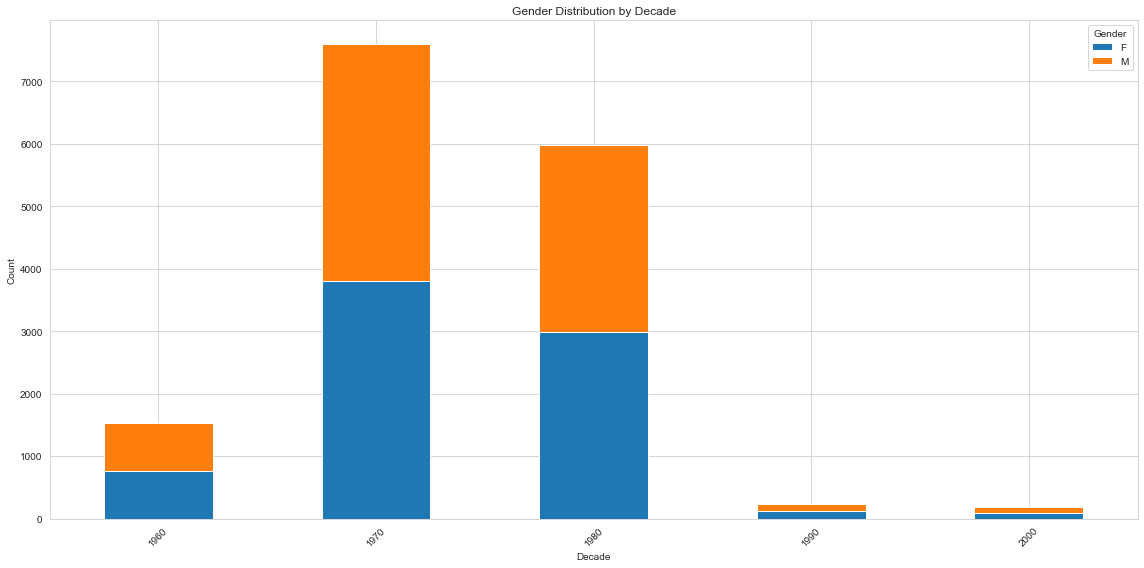

In [347]:
# Group by 'decade' and 'gender', then count occurrences
gender_counts = df_alter.groupby(['decade', 'gender']).size().unstack(fill_value=0)

# Plot the data with a bigger size
gender_counts.plot(kind='bar', stacked=True, figsize=(16, 8))

plt.title('Gender Distribution by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


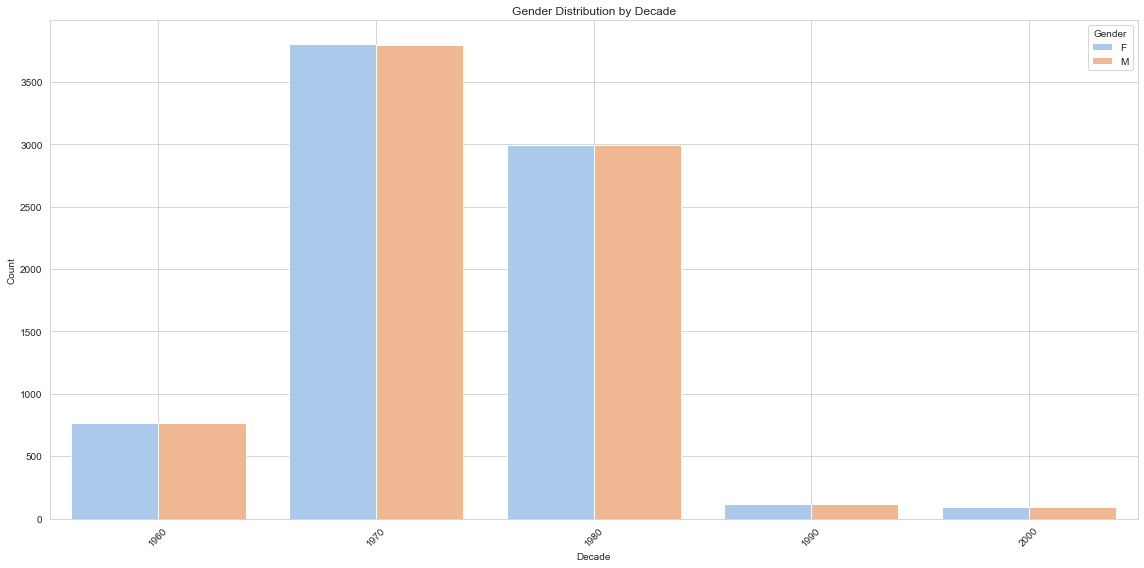

In [348]:
# Group by 'decade' and 'gender', then count occurrences
gender_counts = df_alter.groupby(['decade', 'gender']).size().unstack(fill_value=0)

# Reset index for plotting
gender_counts = gender_counts.reset_index()

# Melt DataFrame for Seaborn
gender_counts_melted = pd.melt(gender_counts, id_vars='decade', var_name='Gender', value_name='Count')

# Set the figure size
plt.figure(figsize=(16, 8))

# Plot using Seaborn
sns.barplot(x='decade', y='Count', hue='Gender', data=gender_counts_melted, palette='pastel')

plt.title('Gender Distribution by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [349]:
# Removing outliers outside of 5 standard deviations

# Calculate the mean and standard deviation
mean = df_alter['births'].mean()
std_dev = df_alter['births'].std()

# Define the range for including values (e.g., within 5 standard deviations from the mean)
lower_bound = mean - 5 * std_dev
upper_bound = mean + 5 * std_dev

# Filter the DataFrame to include only values within the defined range
df_filter = df_alter[(df_alter['births'] >= lower_bound) & (df_alter['births'] <= upper_bound)]

df_filter

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15309,1999,2,NaN,F,145172,1990
15357,2001,2,NaN,F,148640,2000
15381,2002,2,NaN,F,148745,2000
15405,2003,2,NaN,F,150278,2000


In [407]:
df_filter.shape

(15086, 6)

In [408]:
df_filter.describe()

,year,month,day,births
count,15086.000000,15086.000000,15067.000000,15086.000000
mean,1978.440475,6.512661,17.769894,4859.909386
std,5.796574,3.450959,15.284034,5203.340826
min,1969.000000,1.000000,1.000000,1.000000
25%,1973.000000,4.000000,8.000000,4345.000000
50%,1978.000000,7.000000,16.000000,4786.000000
75%,1983.000000,10.000000,24.000000,5248.000000
max,2005.000000,12.000000,99.000000,151949.000000


In [409]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15086 entries, 0 to 15453
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   year    15086 non-null  int64   
 1   month   15086 non-null  int64   
 2   day     15067 non-null  float64 
 3   gender  15086 non-null  object  
 4   births  15086 non-null  int64   
 5   decade  15086 non-null  category
dtypes: category(1), float64(1), int64(3), object(1)
memory usage: 722.1+ KB


In [411]:
df_filter.columns

Index(['year', 'month', 'day', 'gender', 'births', 'decade'], dtype='object')

In [350]:
# We can see from the snapshot, that there are, it seems, only 4 births recorded in the 2000s
# This indicates incomplete data, there may be other data mising also
# It seems esp. from later decades

In [351]:
# Checking decade 2000 entries
df_2000 = df_filter[df_filter['decade'] == '2000']
df_2000


,year,month,day,gender,births,decade
15357,2001,2,NaN,F,148640,2000
15381,2002,2,NaN,F,148745,2000
15405,2003,2,NaN,F,150278,2000
15453,2005,2,NaN,F,151342,2000


In [352]:
# Checking decade 1990 entries
df_1990 = df_filter[df_filter['decade'] == '1990']
df_1990


,year,month,day,gender,births,decade
15117,1991,2,NaN,F,151260,1990
15165,1993,2,NaN,F,148569,1990
15189,1994,2,NaN,F,147453,1990
15213,1995,2,NaN,F,144485,1990
15214,1995,2,NaN,M,150879,1990
15217,1995,4,NaN,F,150914,1990
15231,1995,11,NaN,F,151949,1990
15237,1996,2,NaN,F,147336,1990
15255,1996,11,NaN,F,151621,1990
15261,1997,2,NaN,F,142259,1990


In [353]:
# Assuming df_filter is your DataFrame
df_count_decade = df_filter['decade'].value_counts()
df_count_decade


1970    7597
1980    5935
1960    1536
1990      14
2000       4
Name: decade, dtype: int64

In [354]:
# We can see here, the later two decades and even the third decade seem to be missing alot of data.
# It is possible it was not added due to privacy reasons or because the later data has not been compiled in
# the same way or collated to same extent as previous decaeds yet.

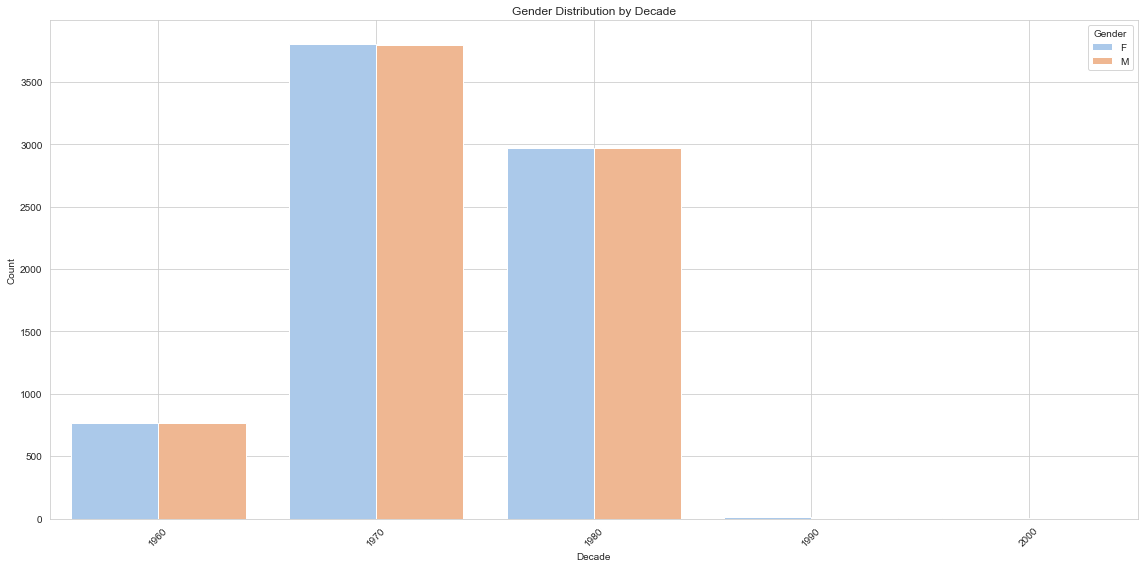

In [355]:
# Ploting a new chart without the outliers
# Group by 'decade' and 'gender', then count occurrences
gender_counts = df_filter.groupby(['decade', 'gender']).size().unstack(fill_value=0)

# Reset index for plotting
gender_counts = gender_counts.reset_index()

# Melt DataFrame for Seaborn
gender_counts_melted = pd.melt(gender_counts, id_vars='decade', var_name='Gender', value_name='Count')

# Set the figure size
plt.figure(figsize=(16, 8))

# Plot using Seaborn
sns.barplot(x='decade', y='Count', hue='Gender', data=gender_counts_melted, palette='pastel')

plt.title('Gender Distribution by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


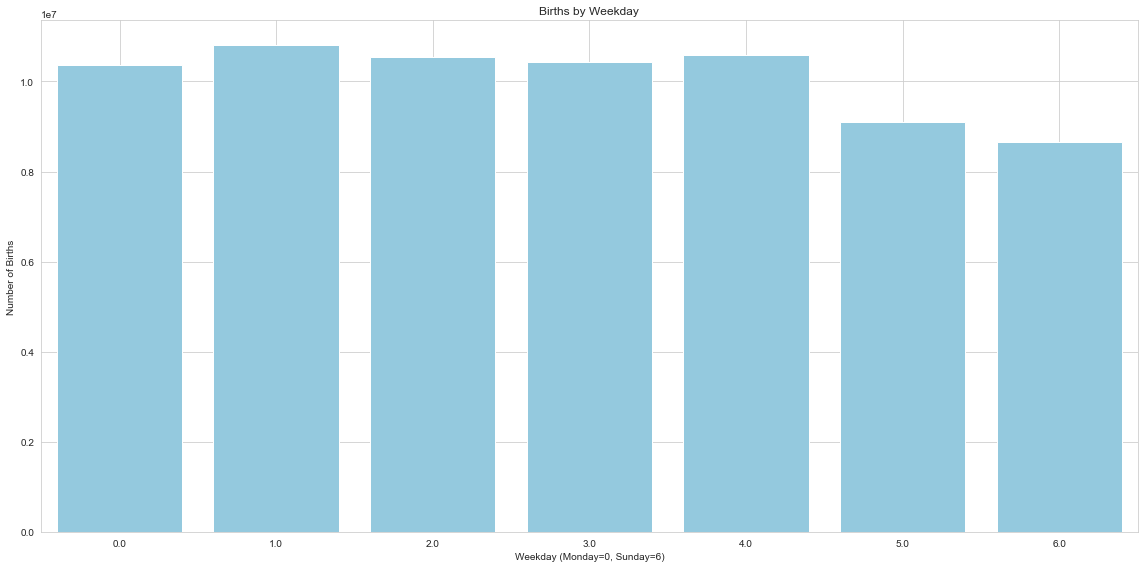

In [356]:
# Create a copy of the subset DataFrame
df_filter_copy = df_filter.copy()

# Convert 'year', 'month', and 'day' to datetime format
df_filter_copy['date'] = pd.to_datetime(df_filter_copy[['year', 'month', 'day']], errors='coerce')

# Extract weekday
df_filter_copy['weekday'] = df_filter_copy['date'].dt.dayofweek  # Monday is 0, Sunday is 6

# Group by weekday and sum births
births_by_weekday = df_filter_copy.groupby('weekday')['births'].sum().reset_index()

# Plot
plt.figure(figsize=(16, 8))
sns.barplot(x='weekday', y='births', data=births_by_weekday, color='skyblue')

plt.title('Births by Weekday')
plt.xlabel('Weekday (Monday=0, Sunday=6)')
plt.ylabel('Number of Births')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


In [357]:
# Group by month and sum births
df_births_by_month = df_filter.groupby('month')['births'].sum().reset_index()

print("Births by Month:")
df_births_by_month

Births by Month:


,month,births
0,1,5759568
1,2,7582391
2,3,5868651
3,4,5712231
4,5,5785602
5,6,5759233
6,7,6220777
7,8,6310276
8,9,6206785
9,10,6056193


In [358]:
# Group by day and sum births
df_births_by_day = df_filter.groupby('day')['births'].sum().reset_index()

print("\nBirths by Day:")
df_births_by_day



Births by Day:


,day,births
0,1.0,2286854
1,2.0,2303168
2,3.0,2309087
3,4.0,2286588
4,5.0,2296951
5,6.0,2308073
6,7.0,2314081
7,8.0,2322376
8,9.0,2315055
9,10.0,2327197


In [359]:
# There is a 99th day recorded
# It seems to be a non-sense break value between months - after 30th and 31st
# These must be dropped


In [360]:
df_births_by_day = df_births_by_day[df_births_by_day['day'] != 99]

In [361]:
df_births_by_day

,day,births
0,1.0,2286854
1,2.0,2303168
2,3.0,2309087
3,4.0,2286588
4,5.0,2296951
5,6.0,2308073
6,7.0,2314081
7,8.0,2322376
8,9.0,2315055
9,10.0,2327197


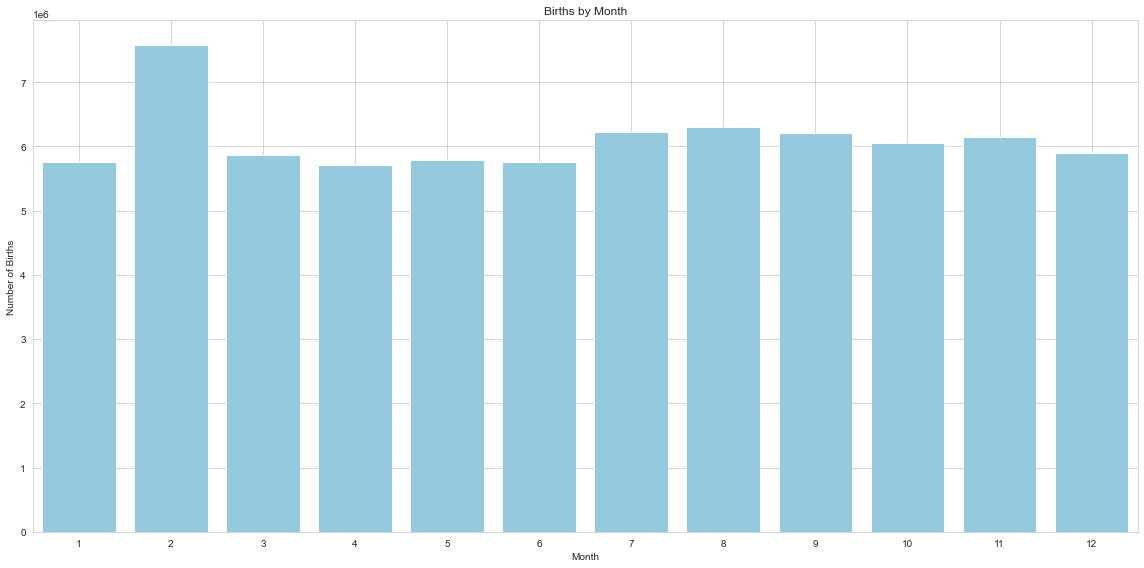

In [362]:
# Plot births by month
plt.figure(figsize=(16, 8))
sns.barplot(x='month', y='births', data=df_births_by_month, color='skyblue')

plt.title('Births by Month')
plt.xlabel('Month')
plt.ylabel('Number of Births')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


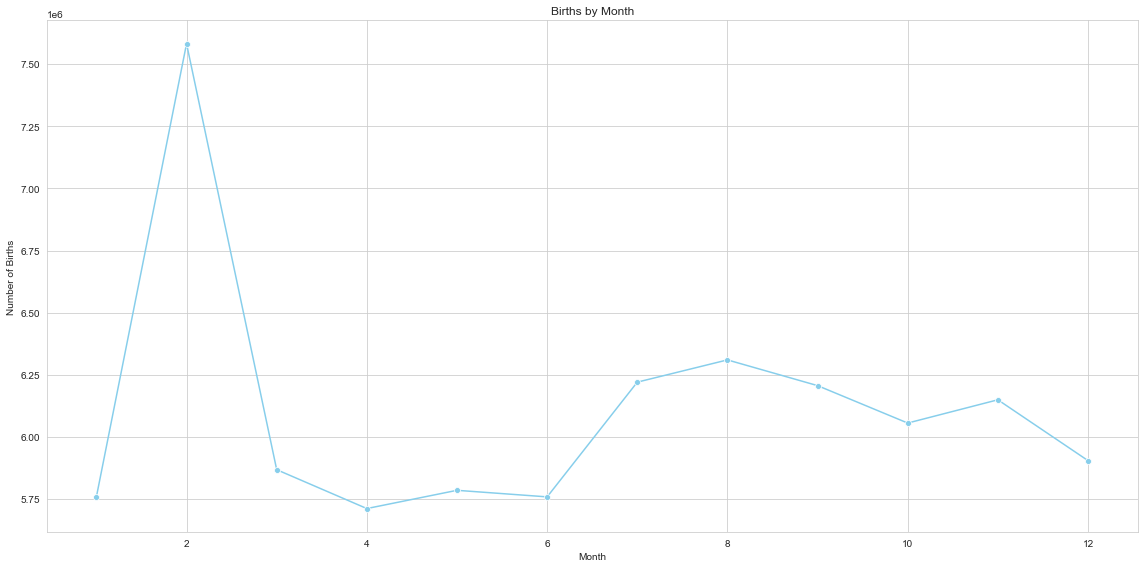

In [363]:
# Plot births by month as a line graph
plt.figure(figsize=(16, 8))
sns.lineplot(x='month', y='births', data=df_births_by_month, marker='o', color='skyblue')

plt.title('Births by Month')
plt.xlabel('Month')
plt.ylabel('Number of Births')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# A spike in number of births in February
# Slump in January, April. May, June. October, December
# Or perhaps, spike in February & August - early spring & late summer births
# Hospitals/ Clinics should be prepared during these times for required extra provision of services/ goods


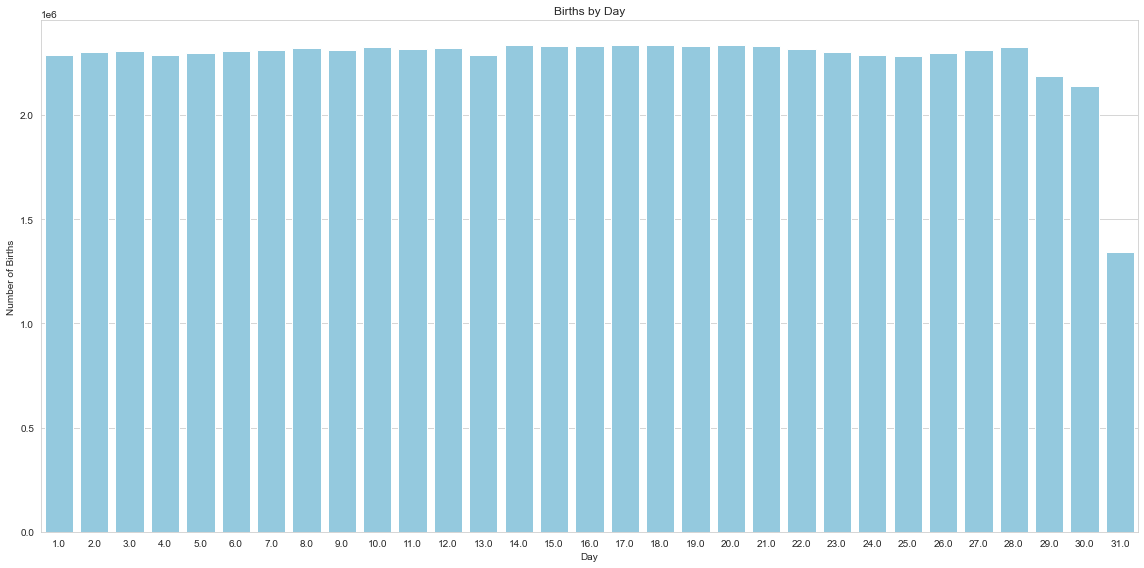

In [364]:
# Plot births by day
plt.figure(figsize=(16, 8))
sns.barplot(x='day', y='births', data=df_births_by_day, color='skyblue')

plt.title('Births by Day')
plt.xlabel('Day')
plt.ylabel('Number of Births')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


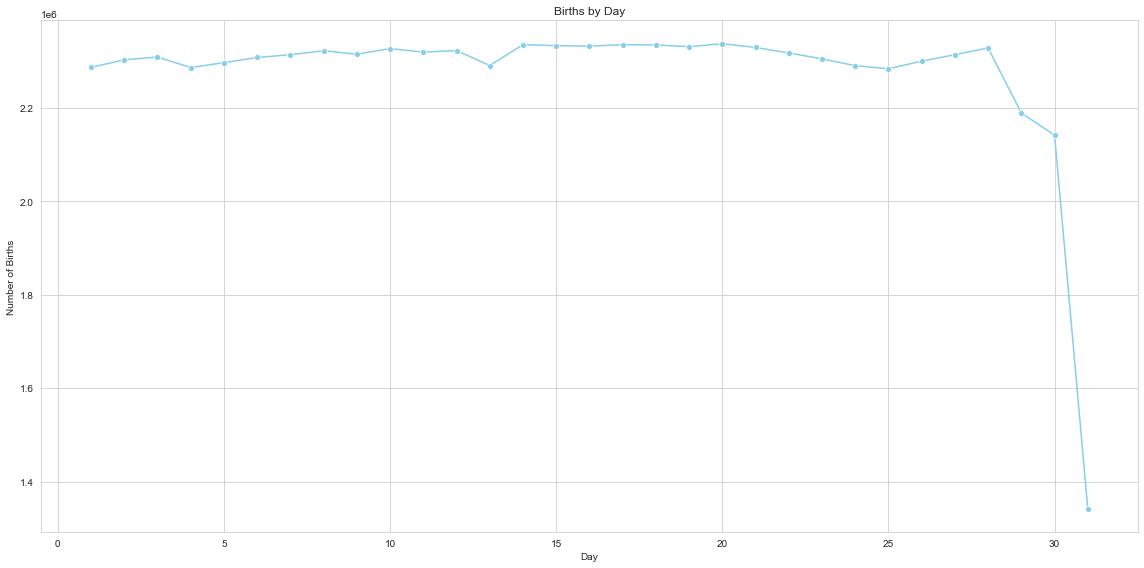

In [365]:
# Plot births by day as a line graph
plt.figure(figsize=(16, 8))
sns.lineplot(x='day', y='births', data=df_births_by_day, marker='o', color='skyblue')

plt.title('Births by Day')
plt.xlabel('Day')
plt.ylabel('Number of Births')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

In [366]:
# A more accurate birth vs day plot - it has removed the day 99 values
# The number of births on the 31st day on the line plot is shown to be significantly less 
# Not all months have a 31st day
# However, such a large difference is strange
# The bar plot of days vs months show the data to be a much more reasonablbe spread,
# This is due to the scale factor bias shown in the line plot - it starts at 1.3, not 0
# The line plot below is more has more reasonably scaled axes
# There the difference in 31st day births is better undeerstood relative to the rest of the month
# It is about half of the other days
# The births along the rest of the days - is almost a completely straight line, 
# With a slight dip in the middle and towards the end of the month (disregarding the 31st)
# Indicating births occurring at a near constant rate throughout the year.
# These slight drops are more easily visible on the bar chart.
# The general extreme equality in proportion of births (except 31st - which almost proportionally accurate),
# Is more easily seen in the pie chart below.



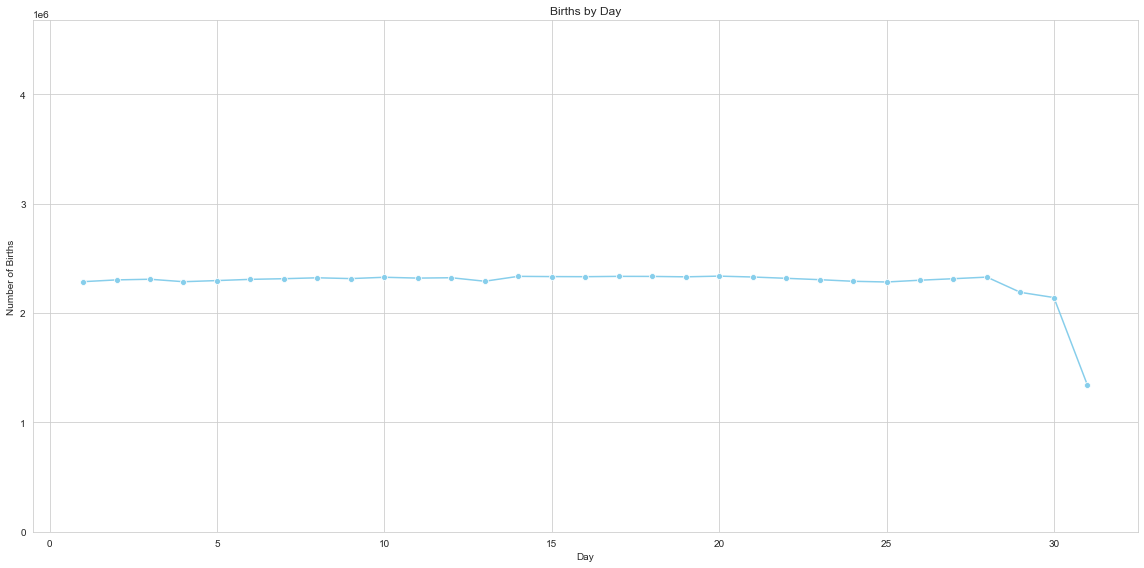

In [367]:
# A more reasonably scaled axes line plot
plt.figure(figsize=(16, 8))
sns.lineplot(x='day', y='births', data=df_births_by_day, marker='o', color='skyblue')

plt.title('Births by Day')
plt.xlabel('Day')
plt.ylabel('Number of Births')
plt.xticks(rotation=0)
plt.grid(True)

# Set the y-axis limits to start from zero
plt.ylim(0, max(df_births_by_day['births']) * 2)

plt.tight_layout()
plt.show()

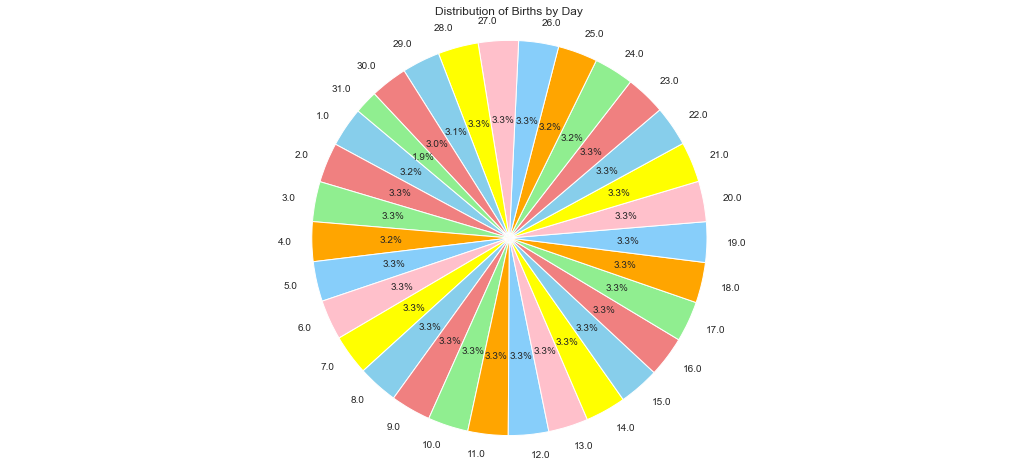

In [368]:
# Data for the pie chart
labels = df_births_by_day['day']
sizes = df_births_by_day['births']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightskyblue', 'pink', 'yellow']

plt.figure(figsize=(18, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Births by Day')

plt.show()

In [369]:
df_alter

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


In [370]:
df_time = df_alter.loc[:, ['month', 'day', 'births']]

In [371]:
df_time

,month,day,births
0,1,1.0,4046
1,1,1.0,4440
2,1,2.0,4454
3,1,2.0,4548
4,1,3.0,4548
...,...,...,...
15542,10,NaN,183219
15543,11,NaN,158939
15544,11,NaN,165468
15545,12,NaN,173215


In [372]:
df_time.info

<bound method DataFrame.info of        month  day  births
0          1  1.0    4046
1          1  1.0    4440
2          1  2.0    4454
3          1  2.0    4548
4          1  3.0    4548
...      ...  ...     ...
15542     10  NaN  183219
15543     11  NaN  158939
15544     11  NaN  165468
15545     12  NaN  173215
15546     12  NaN  181235

[15547 rows x 3 columns]>

In [373]:
df_time.isnull().sum()

month       0
day       480
births      0
dtype: int64

In [374]:
# Drop rows with NaN values in the 'day' column
df_time = df_time.dropna(subset=['day'])


In [375]:
df_time

,month,day,births
0,1,1.0,4046
1,1,1.0,4440
2,1,2.0,4454
3,1,2.0,4548
4,1,3.0,4548
...,...,...,...
15062,12,29.0,5944
15063,12,30.0,5742
15064,12,30.0,6095
15065,12,31.0,4435


In [376]:
df_time.isnull().sum()

month     0
day       0
births    0
dtype: int64

In [377]:
column_name = 'births'    # /'month' /'day' /'births'
non_numeric_present = pd.to_numeric(df_time[column_name], errors='coerce').isna().any()

if non_numeric_present:
    print(f"Non-numeric values are present in the '{column_name}' column.")
else:
    print(f"All values in the '{column_name}' column are numeric.")


All values in the 'births' column are numeric.


In [378]:
#The column to filter for
check_value = 99

# Using boolean indexing to filter rows based on the value in the column
check_rows = df_time[df_time['day'] == check_value]

# Print the filtered rows
print(check_rows)
 

       month   day  births
62         1  99.0      26
63         1  99.0      38
126        2  99.0      42
127        2  99.0      48
190        3  99.0      64
...      ...   ...     ...
14572      4  99.0       1
14635      5  99.0       1
14696      6  99.0       1
14697      6  99.0       1
14944     10  99.0       1

[350 rows x 3 columns]


In [379]:
df_time.head(65)

,month,day,births
0,1,1.0,4046
1,1,1.0,4440
2,1,2.0,4454
3,1,2.0,4548
4,1,3.0,4548
...,...,...,...
60,1,31.0,4780
61,1,31.0,4912
62,1,99.0,26
63,1,99.0,38


In [380]:
# These day 99 rows must be dropped

In [381]:
# The column to filter for
check_value = 99

# Using boolean indexing to filter rows based on the value in the column
check_rows = df_time[df_time['day'] == check_value]

# Print the filtered rows
print(check_rows)
 

       month   day  births
62         1  99.0      26
63         1  99.0      38
126        2  99.0      42
127        2  99.0      48
190        3  99.0      64
...      ...   ...     ...
14572      4  99.0       1
14635      5  99.0       1
14696      6  99.0       1
14697      6  99.0       1
14944     10  99.0       1

[350 rows x 3 columns]


In [382]:
df_time = df_time[df_time['day'] != 99.0]

In [383]:
# The column to filter for
check_value = 99

# Using boolean indexing to filter rows based on the value in the column
check_rows = df_time[df_time['day'] == check_value]

# Print the filtered rows
print(check_rows)
 

Empty DataFrame
Columns: [month, day, births]
Index: []


In [384]:
df_time.head(65)

,month,day,births
0,1,1.0,4046
1,1,1.0,4440
2,1,2.0,4454
3,1,2.0,4548
4,1,3.0,4548
...,...,...,...
60,1,31.0,4780
61,1,31.0,4912
64,2,1.0,4394
65,2,1.0,4736


In [385]:
# The day 99 rows have been dropped (again - copy taken from earlier, more relavent dataframe)

In [386]:
# The dummy year of '2024' has been used for the conversion process

In [387]:
# Convert 'month' and 'day' to integers and then to datetime
df_time['date'] = df_time.apply(lambda row: datetime(2024, int(row['month']), int(row['day']), 0, 0), axis=1)

ValueError: day is out of range for month

In [389]:
# Create a dictionary mapping months with 30 days
months_with_30_days = {4, 6, 9, 11}

# Filter the DataFrame for months with 30 days and 'day' values above 30
invalid_dates = df_time[(df_time['month'].isin(months_with_30_days)) & (df_time['day'] > 30)]

if not invalid_dates.empty:
    print("Invalid dates with 'day' above 30 for months with 30 days:")
    print(invalid_dates)
else:
    print("No invalid dates found with 'day' above 30 for months with 30 days.")

Invalid dates with 'day' above 30 for months with 30 days:
      month   day  births
252       4  31.0      28
253       4  31.0      24
380       6  31.0      20
381       6  31.0      40
572       9  31.0      38
...     ...   ...     ...
7253      6  31.0       3
7443      9  31.0       2
7444      9  31.0       3
7571     11  31.0       2
7572     11  31.0       3

[71 rows x 3 columns]


In [390]:
# There are 71 rows with invalid date entry

In [391]:
# Filter out rows with 'day' values above 30 for months with 30 days
invalid_dates = df_time[(df_time['month'].isin([4, 6, 9, 11])) & (df_time['day'] > 30)]

# Drop the rows with invalid dates from the original DataFrame
df_time = df_time.drop(invalid_dates.index)

df_time


,month,day,births
0,1,1.0,4046
1,1,1.0,4440
2,1,2.0,4454
3,1,2.0,4548
4,1,3.0,4548
...,...,...,...
15062,12,29.0,5944
15063,12,30.0,5742
15064,12,30.0,6095
15065,12,31.0,4435


In [392]:
# Convert 'month' and 'day' to integers and then to datetime
df_time['date'] = df_time.apply(lambda row: datetime(2024, int(row['month']), int(row['day']), 0, 0), axis=1)

ValueError: day is out of range for month

In [393]:
# There is still a problem with some dates - probably February

In [394]:
# Filter out days outside of February days range
invalid_dates_feb = df_time[(df_time['month'] == 2) & (df_time['day'] > 28)]

# Drop the rows with invalid dates for February from the original DataFrame
df_time = df_time.drop(invalid_dates_feb.index)

df_time

,month,day,births
0,1,1.0,4046
1,1,1.0,4440
2,1,2.0,4454
3,1,2.0,4548
4,1,3.0,4548
...,...,...,...
15062,12,29.0,5944
15063,12,30.0,5742
15064,12,30.0,6095
15065,12,31.0,4435


In [395]:
# Convert 'month' and 'day' to integers and then to datetime
df_time['date'] = df_time.apply(lambda row: datetime(2024, int(row['month']), int(row['day']), 0, 0), axis=1)

In [396]:
# The time series object has now been converted

In [397]:
df_time

,month,day,births,date
0,1,1.0,4046,2024-01-01
1,1,1.0,4440,2024-01-01
2,1,2.0,4454,2024-01-02
3,1,2.0,4548,2024-01-02
4,1,3.0,4548,2024-01-03
...,...,...,...,...
15062,12,29.0,5944,2024-12-29
15063,12,30.0,5742,2024-12-30
15064,12,30.0,6095,2024-12-30
15065,12,31.0,4435,2024-12-31


In [398]:
df_time.info

<bound method DataFrame.info of        month   day  births       date
0          1   1.0    4046 2024-01-01
1          1   1.0    4440 2024-01-01
2          1   2.0    4454 2024-01-02
3          1   2.0    4548 2024-01-02
4          1   3.0    4548 2024-01-03
...      ...   ...     ...        ...
15062     12  29.0    5944 2024-12-29
15063     12  30.0    5742 2024-12-30
15064     12  30.0    6095 2024-12-30
15065     12  31.0    4435 2024-12-31
15066     12  31.0    4698 2024-12-31

[14600 rows x 4 columns]>

In [399]:
df_time.shape

(14600, 4)

In [400]:
df_time.describe()

,month,day,births
count,14600.000000,14600.000000,14600.000000
mean,6.526027,15.720548,4824.607808
std,3.447969,8.796548,580.058914
min,1.000000,1.000000,3249.000000
25%,4.000000,8.000000,4383.000000
50%,7.000000,16.000000,4812.000000
75%,10.000000,23.000000,5259.000000
max,12.000000,31.000000,6527.000000


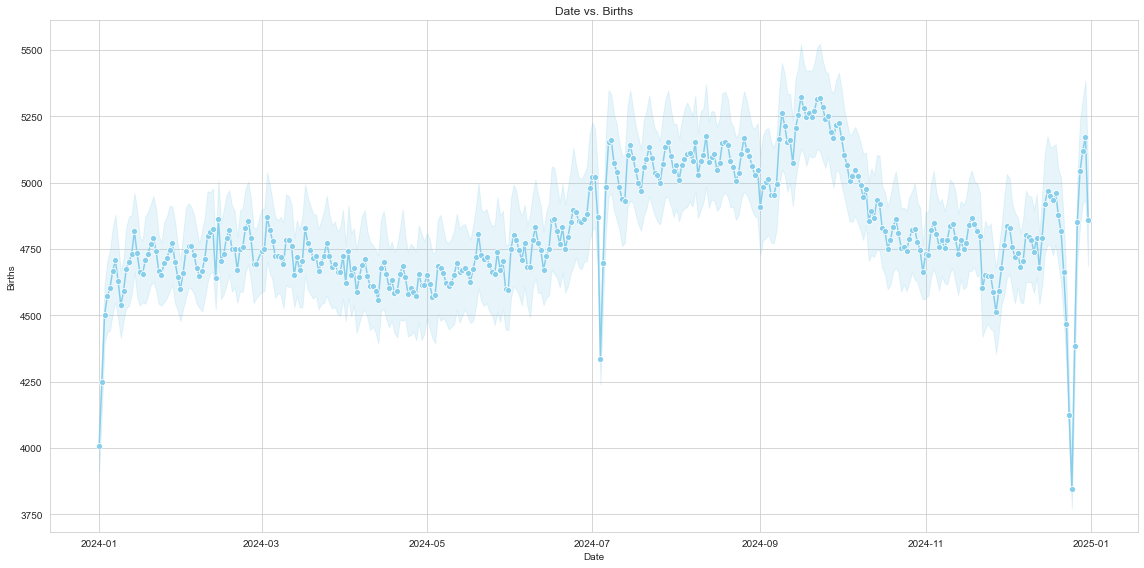

In [401]:
# Plotting date vs. births using Seaborn
plt.figure(figsize=(16,8))
sns.lineplot(x='date', y='births', data=df_time, marker='o', color='skyblue')
plt.title('Date vs. Births')
plt.xlabel('Date')
plt.ylabel('Births')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


In [413]:
df_time

,month,day,births,date
0,1,1.0,4046,2024-01-01
1,1,1.0,4440,2024-01-01
2,1,2.0,4454,2024-01-02
3,1,2.0,4548,2024-01-02
4,1,3.0,4548,2024-01-03
...,...,...,...,...
15062,12,29.0,5944,2024-12-29
15063,12,30.0,5742,2024-12-30
15064,12,30.0,6095,2024-12-30
15065,12,31.0,4435,2024-12-31


In [414]:
# Convert 'date' column to datetime format
df_time['date'] = pd.to_datetime(df_time['date'])

# Add a new column with month names
df_time['month_name'] = df_time['date'].dt.strftime('%B')

# Display the updated DataFrame with month names
df_time

,month,day,births,date,month_name
0,1,1.0,4046,2024-01-01,January
1,1,1.0,4440,2024-01-01,January
2,1,2.0,4454,2024-01-02,January
3,1,2.0,4548,2024-01-02,January
4,1,3.0,4548,2024-01-03,January
...,...,...,...,...,...
15062,12,29.0,5944,2024-12-29,December
15063,12,30.0,5742,2024-12-30,December
15064,12,30.0,6095,2024-12-30,December
15065,12,31.0,4435,2024-12-31,December


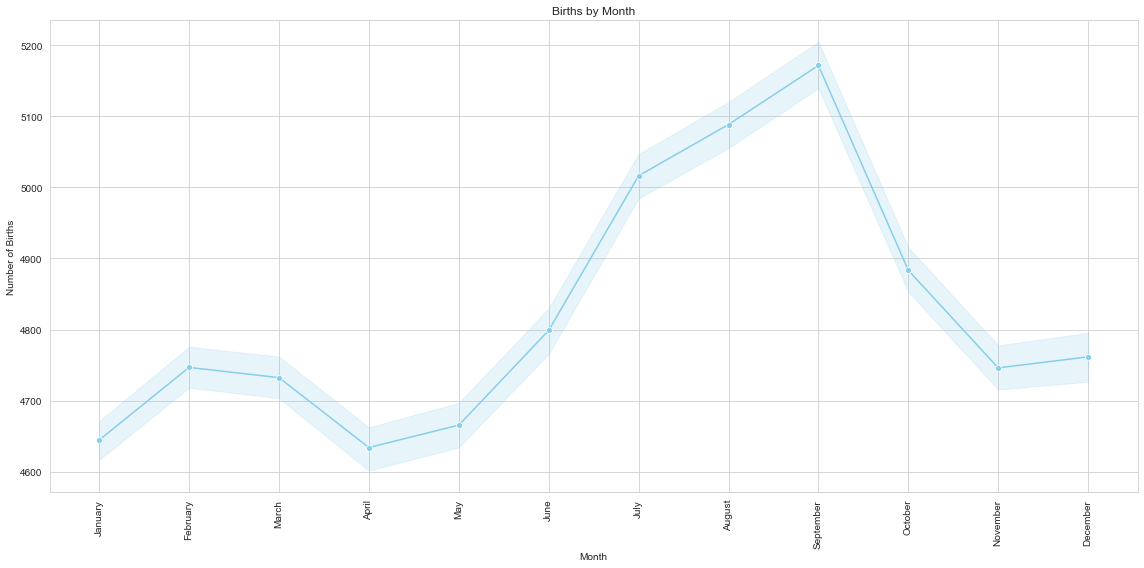

In [416]:
# Create the Seaborn line plot
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_time, x='month_name', y='births', marker='o', color='skyblue')
plt.title('Births by Month')
plt.xlabel('Month')
plt.ylabel('Number of Births')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


In [412]:
# Some small spikes and large drops - perhaps collation problem - should be further investigated
# Generally around 4750 - 5250 (~500) births per day
# More births in July - October, esp. September
# Drop in births in January, April, May


In [402]:
df_births.shape

(15547, 5)

In [403]:
df_time.shape

(14600, 4)

In [404]:
15547 - 14600

947

In [405]:
(947 / 15547)  * 100

6.0912073068759245

In [406]:
# 947 rows dropped from original data
# 6.1% of original data discarded